# Logistic Regression

In [3]:
import importlib
import numpy as np
import pandas as pd
import model_functions
from model_functions import preprocess_data
importlib.reload(model_functions)

<module 'model_functions' from '/Users/tania_priv/Documents/project2aml/WDBC/model_functions.py'>

In [4]:
prep_data = preprocess_data()

df = prep_data["df"]
X_train = prep_data["X_train"]
X_test = prep_data["X_test"]
y_train = prep_data["y_train"]
y_test = prep_data["y_test"]
X_train_scaled = prep_data["X_train_scaled"]
X_test_scaled = prep_data["X_test_scaled"]
X_train_pca = prep_data["X_train_pca"]
X_test_pca = prep_data["X_test_pca"]
y_train_numeric = y_train.replace({"Malignant": 1, "Benign": 0}).astype(float)
y_test_numeric  = y_test.replace({"Malignant": 1, "Benign": 0}).astype(float)

/var/folders/gx/8_x0j9wx7kl8gs36bydwh7l00000gr/T/ipykernel_32549/2307572630.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_numeric = y_train.replace({"Malignant": 1, "Benign": 0}).astype(float)
/var/folders/gx/8_x0j9wx7kl8gs36bydwh7l00000gr/T/ipykernel_32549/2307572630.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_train_numeric = y_train.replace({"Malignant": 1, "Benign": 0}).astype(float)
/var/folders/gx/8_x0j9wx7kl8gs36bydwh7l00000gr/T/ipykernel_32549/2307572630.py:13: FutureWarning: Downcasting behavior in `replace` is de

In [5]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression(penalty='l2', 
                        C=10,
                        solver='liblinear',
                        max_iter=1000)

In [6]:
clf = model.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

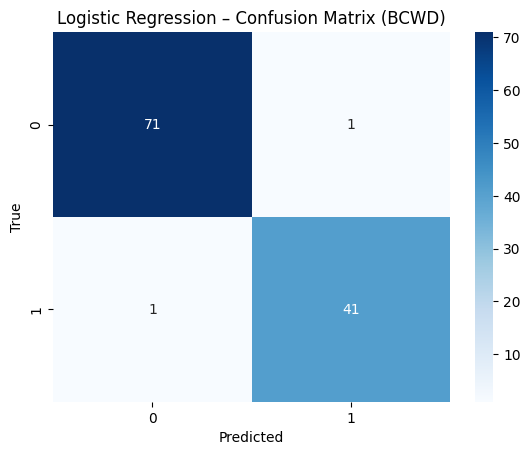

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Example
plot_confusion(y_test, y_pred, "Logistic Regression – Confusion Matrix (BCWD)")
